In [48]:
import pip
pip.main(["install","opencv-python"])
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
get_ipython().run_line_magic('matplotlib', 'inline')
import tensorflow as tf

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [35]:
import cv2
import os

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

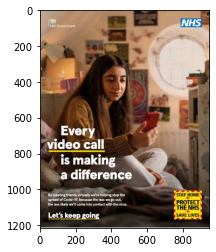

In [37]:
img = image.load_img("/Users/mahelwimaladasa/Desktop/BaseData/Test/01 Very Good/Image00001.jpeg")
plt.imshow(img)

In [38]:
cv2.imread("/Users/mahelwimaladasa/Desktop/BaseData/Test/01 Very Good/Image00001.jpeg").shape

(1216, 948, 3)

In [39]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [40]:
train_dataset = train.flow_from_directory('/Users/mahelwimaladasa/Desktop/BaseData/Test/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = train.flow_from_directory('/Users/mahelwimaladasa/Desktop/BaseData/Validation/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [41]:
train_dataset.class_indices
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
validation_dataset.class_indices
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [43]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                            tf.keras.layers.MaxPool2D(2,2),
                            #
                            tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            #
                            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                            ##
                            tf.keras.layers.Flatten(),
                            ##
                            tf.keras.layers.Dense(512,activation= 'relu'),
                            ##
                            tf.keras.layers.Dense(1,activation= 'sigmoid'),
                            ])

In [45]:
model.compile(loss = 'binary_crossentropy',
             optimizer = Adam(learning_rate=0.0001),
             metrics = ['accuracy'])

In [46]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 500,
                     validation_data = validation_dataset)

Epoch 1/500
3/3 [==============================] - 6s 3s/step - loss: 1.0187 - accuracy: 0.5556 - val_loss: 1.1183 - val_accuracy: 0.5000
Epoch 2/500
3/3 [==============================] - 5s 2s/step - loss: 0.7691 - accuracy: 0.5556 - val_loss: 0.7451 - val_accuracy: 0.5000
Epoch 3/500
3/3 [==============================] - 5s 2s/step - loss: 0.6168 - accuracy: 0.7778 - val_loss: 0.6954 - val_accuracy: 0.4600
Epoch 4/500
3/3 [==============================] - 5s 2s/step - loss: 0.6840 - accuracy: 0.6667 - val_loss: 0.6954 - val_accuracy: 0.4900
Epoch 5/500
3/3 [==============================] - 5s 2s/step - loss: 0.6535 - accuracy: 0.6667 - val_loss: 0.7178 - val_accuracy: 0.5000
Epoch 6/500
3/3 [==============================] - 5s 2s/step - loss: 0.7812 - accuracy: 0.4444 - val_loss: 0.7182 - val_accuracy: 0.5000
Epoch 7/500
3/3 [==============================] - 5s 2s/step - loss: 0.7038 - accuracy: 0.4444 - val_loss: 0.7055 - val_accuracy: 0.5000
Epoch 8/500
3/3 [=================

3/3 [==============================] - 5s 2s/step - loss: 0.6756 - accuracy: 0.6667 - val_loss: 0.7044 - val_accuracy: 0.4950
Epoch 61/500
3/3 [==============================] - 5s 2s/step - loss: 0.6897 - accuracy: 0.3333 - val_loss: 0.7096 - val_accuracy: 0.5400
Epoch 62/500
3/3 [==============================] - 5s 2s/step - loss: 0.6806 - accuracy: 0.6667 - val_loss: 0.7386 - val_accuracy: 0.5000
Epoch 63/500
3/3 [==============================] - 5s 2s/step - loss: 0.6299 - accuracy: 0.6667 - val_loss: 0.7522 - val_accuracy: 0.4950
Epoch 64/500
3/3 [==============================] - 5s 2s/step - loss: 0.5273 - accuracy: 0.6667 - val_loss: 0.7621 - val_accuracy: 0.4900
Epoch 65/500
3/3 [==============================] - 5s 2s/step - loss: 0.6788 - accuracy: 0.5556 - val_loss: 0.7647 - val_accuracy: 0.4950
Epoch 66/500
3/3 [==============================] - 5s 2s/step - loss: 0.7363 - accuracy: 0.5556 - val_loss: 0.7594 - val_accuracy: 0.5100
Epoch 67/500
3/3 [======================

Epoch 119/500
3/3 [==============================] - 5s 2s/step - loss: 0.6705 - accuracy: 0.4444 - val_loss: 0.6739 - val_accuracy: 0.5900
Epoch 120/500
3/3 [==============================] - 5s 2s/step - loss: 0.6088 - accuracy: 0.6667 - val_loss: 0.6858 - val_accuracy: 0.5650
Epoch 121/500
3/3 [==============================] - 5s 2s/step - loss: 0.6076 - accuracy: 0.6667 - val_loss: 0.7182 - val_accuracy: 0.5150
Epoch 122/500
3/3 [==============================] - 5s 2s/step - loss: 0.5913 - accuracy: 0.7778 - val_loss: 0.7608 - val_accuracy: 0.4900
Epoch 123/500
3/3 [==============================] - 5s 2s/step - loss: 0.5987 - accuracy: 0.5556 - val_loss: 0.7808 - val_accuracy: 0.4900
Epoch 124/500
3/3 [==============================] - 5s 2s/step - loss: 0.6104 - accuracy: 0.4444 - val_loss: 0.7528 - val_accuracy: 0.5300
Epoch 125/500
3/3 [==============================] - 5s 2s/step - loss: 0.6455 - accuracy: 0.4444 - val_loss: 0.7236 - val_accuracy: 0.5300
Epoch 126/500
3/3 [=

3/3 [==============================] - 5s 2s/step - loss: 0.7818 - accuracy: 0.4444 - val_loss: 0.7328 - val_accuracy: 0.5200
Epoch 178/500
3/3 [==============================] - 5s 2s/step - loss: 0.7618 - accuracy: 0.3750 - val_loss: 0.6890 - val_accuracy: 0.5450
Epoch 179/500
3/3 [==============================] - 5s 2s/step - loss: 0.5435 - accuracy: 0.7778 - val_loss: 0.6796 - val_accuracy: 0.5800
Epoch 180/500
3/3 [==============================] - 5s 2s/step - loss: 0.6340 - accuracy: 0.6667 - val_loss: 0.6874 - val_accuracy: 0.5700
Epoch 181/500
3/3 [==============================] - 5s 2s/step - loss: 0.5124 - accuracy: 0.8889 - val_loss: 0.7077 - val_accuracy: 0.5600
Epoch 182/500
3/3 [==============================] - 5s 2s/step - loss: 0.6135 - accuracy: 0.7778 - val_loss: 0.7279 - val_accuracy: 0.5600
Epoch 183/500
3/3 [==============================] - 5s 2s/step - loss: 0.5797 - accuracy: 0.5556 - val_loss: 0.7170 - val_accuracy: 0.5650
Epoch 184/500
3/3 [===============

3/3 [==============================] - 5s 2s/step - loss: 0.5097 - accuracy: 0.7778 - val_loss: 0.6794 - val_accuracy: 0.5850
Epoch 236/500
3/3 [==============================] - 5s 2s/step - loss: 0.6165 - accuracy: 0.6667 - val_loss: 0.6918 - val_accuracy: 0.5800
Epoch 237/500
3/3 [==============================] - 5s 2s/step - loss: 0.6689 - accuracy: 0.6667 - val_loss: 0.7206 - val_accuracy: 0.6050
Epoch 238/500
3/3 [==============================] - 5s 2s/step - loss: 0.4851 - accuracy: 0.8889 - val_loss: 0.7544 - val_accuracy: 0.5850
Epoch 239/500
3/3 [==============================] - 5s 2s/step - loss: 0.7583 - accuracy: 0.4444 - val_loss: 0.6903 - val_accuracy: 0.6150
Epoch 240/500
3/3 [==============================] - 5s 2s/step - loss: 0.3718 - accuracy: 0.8889 - val_loss: 0.6685 - val_accuracy: 0.6100
Epoch 241/500
3/3 [==============================] - 5s 2s/step - loss: 0.3549 - accuracy: 1.0000 - val_loss: 0.6634 - val_accuracy: 0.6250
Epoch 242/500
3/3 [===============

3/3 [==============================] - 5s 2s/step - loss: 0.2531 - accuracy: 1.0000 - val_loss: 0.7582 - val_accuracy: 0.6000
Epoch 294/500
3/3 [==============================] - 5s 2s/step - loss: 0.6090 - accuracy: 0.5556 - val_loss: 0.6745 - val_accuracy: 0.6350
Epoch 295/500
3/3 [==============================] - 5s 2s/step - loss: 0.3474 - accuracy: 0.8889 - val_loss: 0.6424 - val_accuracy: 0.6450
Epoch 296/500
3/3 [==============================] - 5s 2s/step - loss: 0.6627 - accuracy: 0.6667 - val_loss: 0.6418 - val_accuracy: 0.6350
Epoch 297/500
3/3 [==============================] - 5s 2s/step - loss: 0.6656 - accuracy: 0.5556 - val_loss: 0.6715 - val_accuracy: 0.6100
Epoch 298/500
3/3 [==============================] - 5s 2s/step - loss: 0.4806 - accuracy: 0.6667 - val_loss: 0.6797 - val_accuracy: 0.5750
Epoch 299/500
3/3 [==============================] - 5s 2s/step - loss: 0.5236 - accuracy: 0.8889 - val_loss: 0.6839 - val_accuracy: 0.5800
Epoch 300/500
3/3 [===============

3/3 [==============================] - 5s 2s/step - loss: 0.4597 - accuracy: 0.7778 - val_loss: 0.6106 - val_accuracy: 0.6600
Epoch 352/500
3/3 [==============================] - 5s 2s/step - loss: 0.7632 - accuracy: 0.4444 - val_loss: 0.6068 - val_accuracy: 0.6550
Epoch 353/500
3/3 [==============================] - 5s 2s/step - loss: 0.4372 - accuracy: 0.7778 - val_loss: 0.5906 - val_accuracy: 0.6850
Epoch 354/500
3/3 [==============================] - 5s 2s/step - loss: 0.3429 - accuracy: 0.8889 - val_loss: 0.5868 - val_accuracy: 0.7050
Epoch 355/500
3/3 [==============================] - 5s 2s/step - loss: 0.5122 - accuracy: 0.7778 - val_loss: 0.5886 - val_accuracy: 0.6750
Epoch 356/500
3/3 [==============================] - 46s 23s/step - loss: 0.3583 - accuracy: 0.8889 - val_loss: 0.5932 - val_accuracy: 0.6750
Epoch 357/500
3/3 [==============================] - 5s 2s/step - loss: 0.3159 - accuracy: 0.8889 - val_loss: 0.5995 - val_accuracy: 0.7200
Epoch 358/500
3/3 [=============

3/3 [==============================] - 5s 2s/step - loss: 0.5526 - accuracy: 0.6667 - val_loss: 0.5716 - val_accuracy: 0.6850
Epoch 410/500
3/3 [==============================] - 5s 2s/step - loss: 0.2987 - accuracy: 0.8889 - val_loss: 0.5859 - val_accuracy: 0.6650
Epoch 411/500
3/3 [==============================] - 6s 3s/step - loss: 0.2654 - accuracy: 0.8889 - val_loss: 0.6264 - val_accuracy: 0.6600
Epoch 412/500
3/3 [==============================] - 5s 3s/step - loss: 0.2913 - accuracy: 1.0000 - val_loss: 0.6283 - val_accuracy: 0.6600
Epoch 413/500
3/3 [==============================] - 5s 2s/step - loss: 0.6619 - accuracy: 0.7778 - val_loss: 0.5876 - val_accuracy: 0.6900
Epoch 414/500
3/3 [==============================] - 5s 2s/step - loss: 0.2917 - accuracy: 1.0000 - val_loss: 0.5473 - val_accuracy: 0.7350
Epoch 415/500
3/3 [==============================] - 5s 2s/step - loss: 0.4278 - accuracy: 0.8889 - val_loss: 0.5433 - val_accuracy: 0.7400
Epoch 416/500
3/3 [===============

3/3 [==============================] - 5s 2s/step - loss: 0.3034 - accuracy: 1.0000 - val_loss: 0.5417 - val_accuracy: 0.7350
Epoch 468/500
3/3 [==============================] - 5s 2s/step - loss: 0.3227 - accuracy: 0.8889 - val_loss: 0.5622 - val_accuracy: 0.7300
Epoch 469/500
3/3 [==============================] - 5s 2s/step - loss: 0.2941 - accuracy: 0.8889 - val_loss: 0.5567 - val_accuracy: 0.7350
Epoch 470/500
3/3 [==============================] - 5s 2s/step - loss: 0.1322 - accuracy: 1.0000 - val_loss: 0.5488 - val_accuracy: 0.7250
Epoch 471/500
3/3 [==============================] - 6s 3s/step - loss: 0.2046 - accuracy: 1.0000 - val_loss: 0.5369 - val_accuracy: 0.7350
Epoch 472/500
3/3 [==============================] - 5s 2s/step - loss: 0.6450 - accuracy: 0.7778 - val_loss: 0.5241 - val_accuracy: 0.7600
Epoch 473/500
3/3 [==============================] - 5s 2s/step - loss: 0.6745 - accuracy: 0.5556 - val_loss: 0.5813 - val_accuracy: 0.7200
Epoch 474/500
3/3 [===============

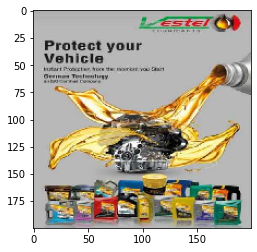

Bad


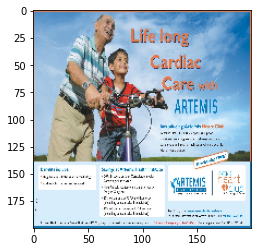

Bad


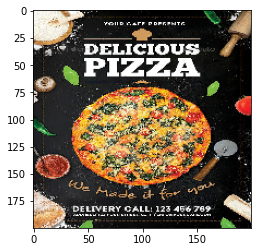

Bad


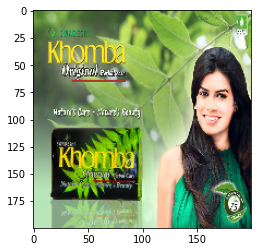

Bad


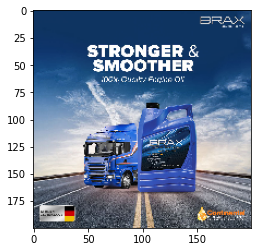

Bad


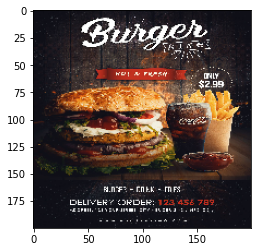

Bad


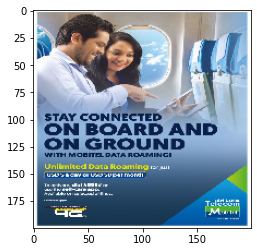

Bad


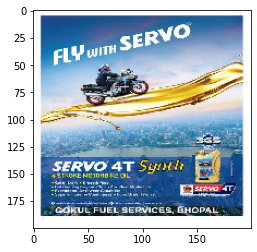

Bad


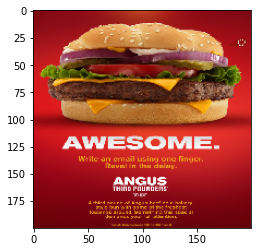

Bad


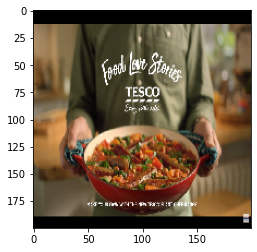

Bad


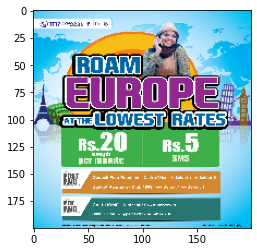

Bad


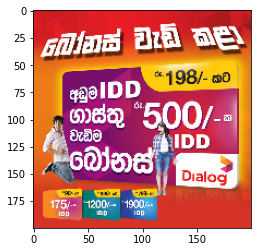

Bad


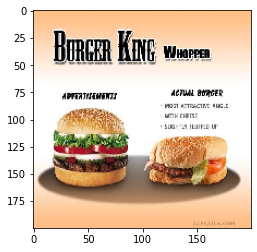

Bad


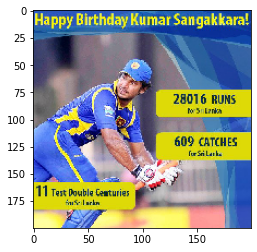

Bad


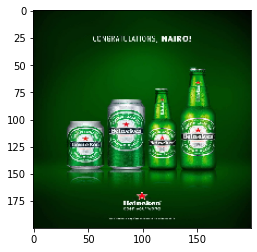

Bad


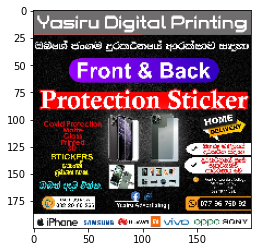

Bad


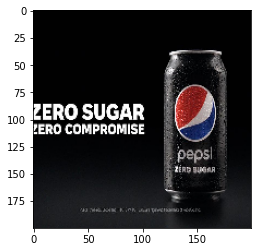

Bad


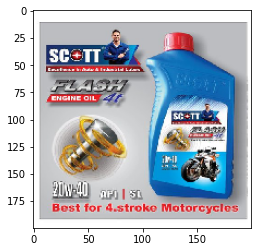

Bad


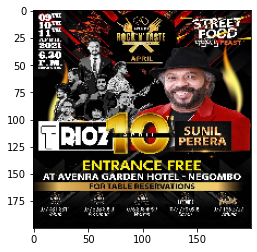

Bad


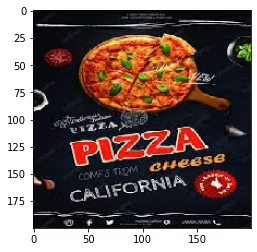

Bad


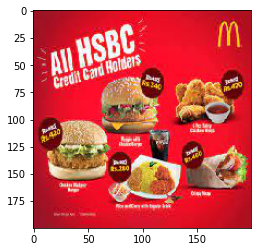

Bad


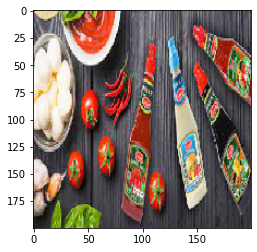

Bad


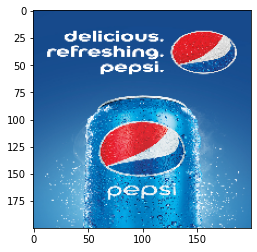

Bad


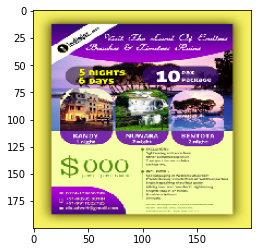

Bad


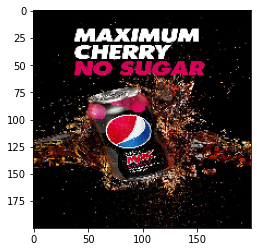

Bad


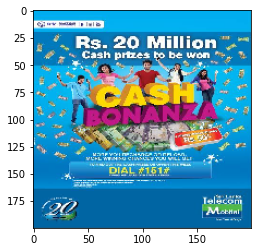

Bad


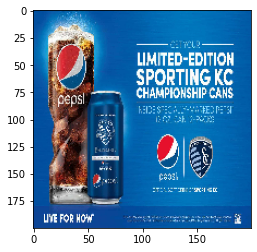

Bad


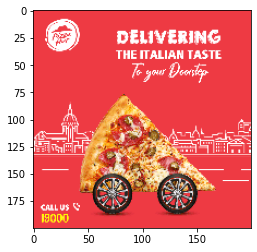

Bad


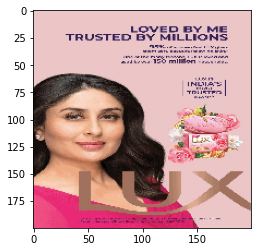

Bad


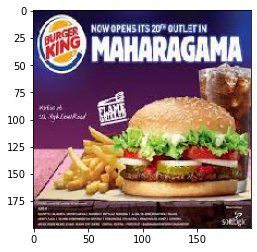

Bad


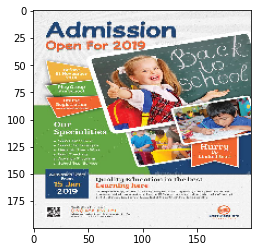

Bad


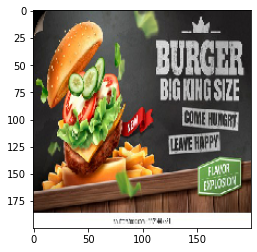

Bad


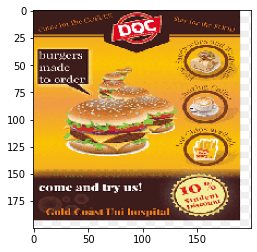

Bad


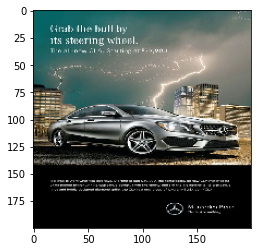

Bad


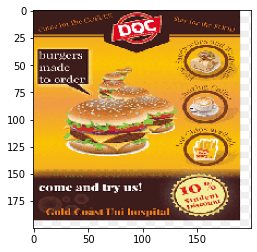

Bad


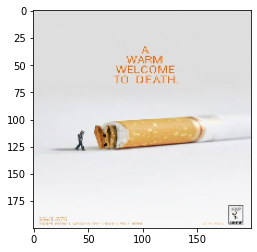

Bad


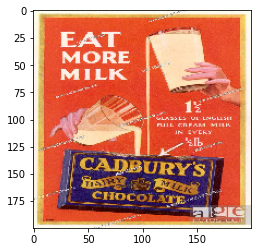

Bad


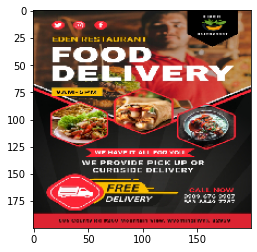

Bad


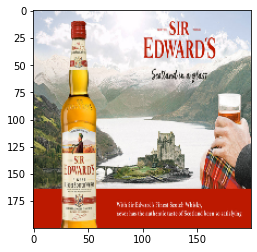

Bad


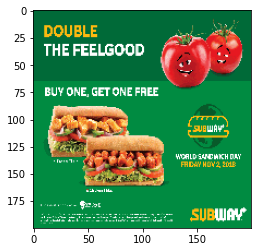

Bad


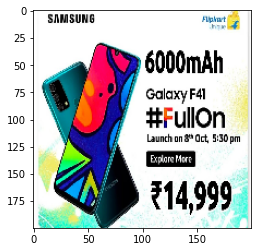

Bad


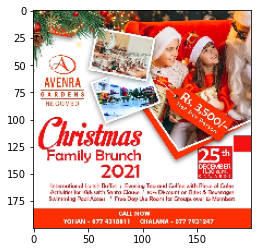

Bad


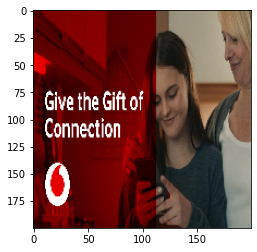

Bad


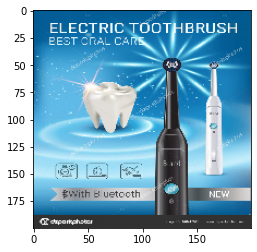

Bad


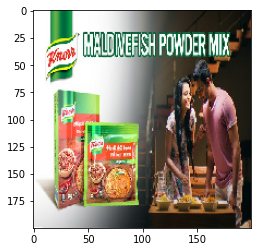

Bad


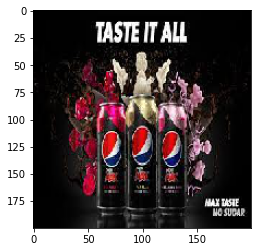

Bad


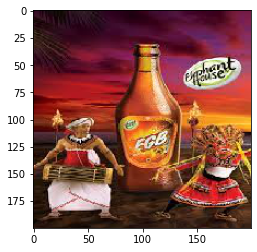

Bad


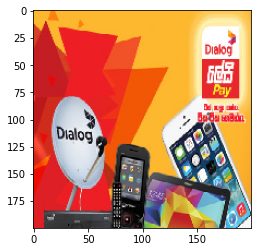

Bad


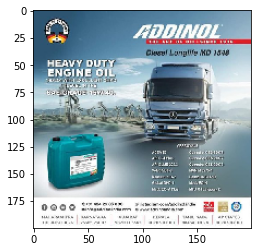

Bad


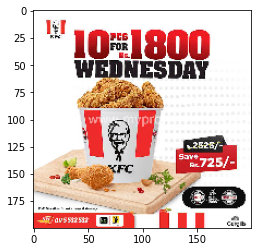

Bad


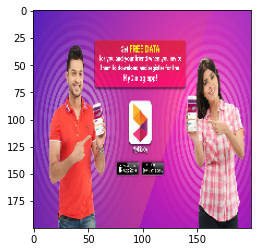

Bad


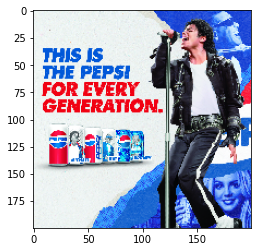

Bad


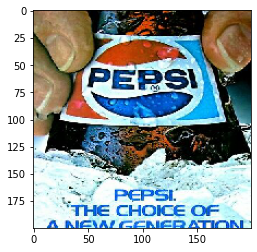

Bad


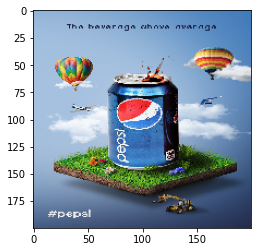

Bad


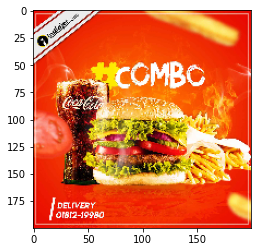

Bad


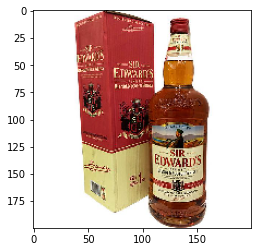

Bad


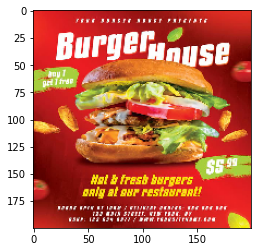

Bad


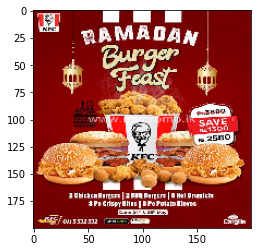

Bad


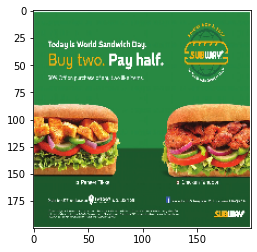

Bad


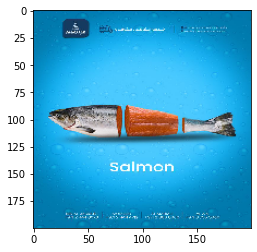

Bad


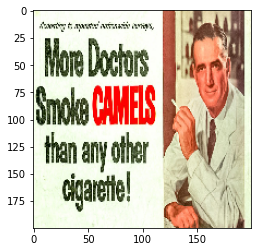

Bad


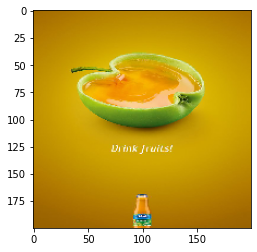

Bad


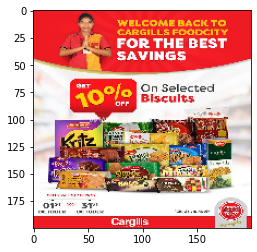

Bad


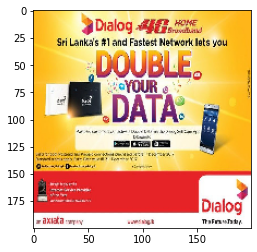

Bad


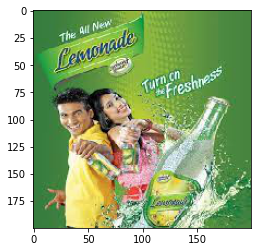

Bad


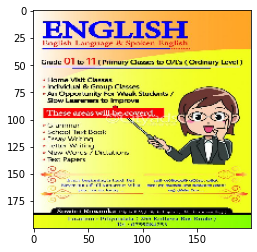

Bad


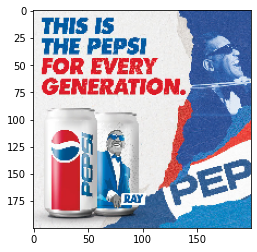

Bad


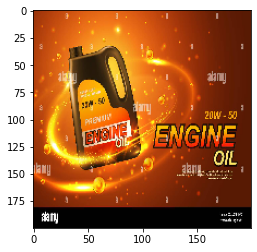

Bad


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f9a95668720>

In [15]:
dir_path = '/Users/mahelwimaladasa/Desktop/BaseData/Test/01 Very Good'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print("Good")
    else:
        print("Bad")